In [ ]:
//@version=5
indicator("30-Min High/Low Area Color + Line Until Body Overlap", overlay=true)

// Get 30-minute values
thirtyMinHigh = request.security(syminfo.tickerid, "30", high, lookahead=barmerge.lookahead_on)
thirtyMinLow  = request.security(syminfo.tickerid, "30", low, lookahead=barmerge.lookahead_on)
thirtyMinOpen = request.security(syminfo.tickerid, "30", open, lookahead=barmerge.lookahead_on)
thirtyMinClose = request.security(syminfo.tickerid, "30", close, lookahead=barmerge.lookahead_on)
thirtyMinBarIndex = request.security(syminfo.tickerid, "30", bar_index, lookahead=barmerge.lookahead_on)

// Determine candle direction
isBullish = thirtyMinClose > thirtyMinOpen
isBearish = thirtyMinClose < thirtyMinOpen

// Plot invisible outlines for fill
plotHighGreen = plot(isBullish ? thirtyMinHigh : na, title="High Bullish", color=color.new(#4caf4f, 100))
plotLowGreen = plot(isBullish ? thirtyMinLow : na, title="Low Bullish", color=color.new(#4caf4f, 100))

plotHighRed = plot(isBearish ? thirtyMinHigh : na, title="High Bearish", color=color.new(#ff5252, 100))
plotLowRed = plot(isBearish ? thirtyMinLow : na, title="Low Bearish", color=color.new(#ff5252, 100))

// Fill between high and low based on candle direction
fill(plotHighGreen, plotLowGreen, color=color.new(#008080, 93), title="Bullish Area")
fill(plotHighRed, plotLowRed, color=color.new(#FF0000, 93), title="Bearish Area")


// State tracking
var int prevThirtyMinBarIndex = na

var float highPrice = na
var int highStartBar = na
var line highLine = na
var bool highActive = false

var float lowPrice = na
var int lowStartBar = na
var line lowLine = na
var bool lowActive = false

// Detect new 30-minute period
if thirtyMinBarIndex != prevThirtyMinBarIndex
    prevThirtyMinBarIndex := thirtyMinBarIndex

    // Reset high
    highPrice := na
    highStartBar := na
    if not na(highLine)
        line.delete(highLine)
    highLine := na
    highActive := false

    // Reset low
    lowPrice := na
    lowStartBar := na
    if not na(lowLine)
        line.delete(lowLine)
    lowLine := na
    lowActive := false

// Extend high line until body overlaps
if highActive and not na(highLine)
    bodyMin = math.min(open, close)
    bodyMax = math.max(open, close)
    if highPrice <= bodyMax and highPrice >= bodyMin
        line.set_x2(highLine, bar_index)
        line.set_y2(highLine, highPrice)
        highActive := false
    else
        line.set_x2(highLine, bar_index)
        line.set_y2(highLine, highPrice)

// Extend low line until body overlaps
if lowActive and not na(lowLine)
    bodyMin = math.min(open, close)
    bodyMax = math.max(open, close)
    if lowPrice <= bodyMax and lowPrice >= bodyMin
        line.set_x2(lowLine, bar_index)
        line.set_y2(lowLine, lowPrice)
        lowActive := false
    else
        line.set_x2(lowLine, bar_index)
        line.set_y2(lowLine, lowPrice)


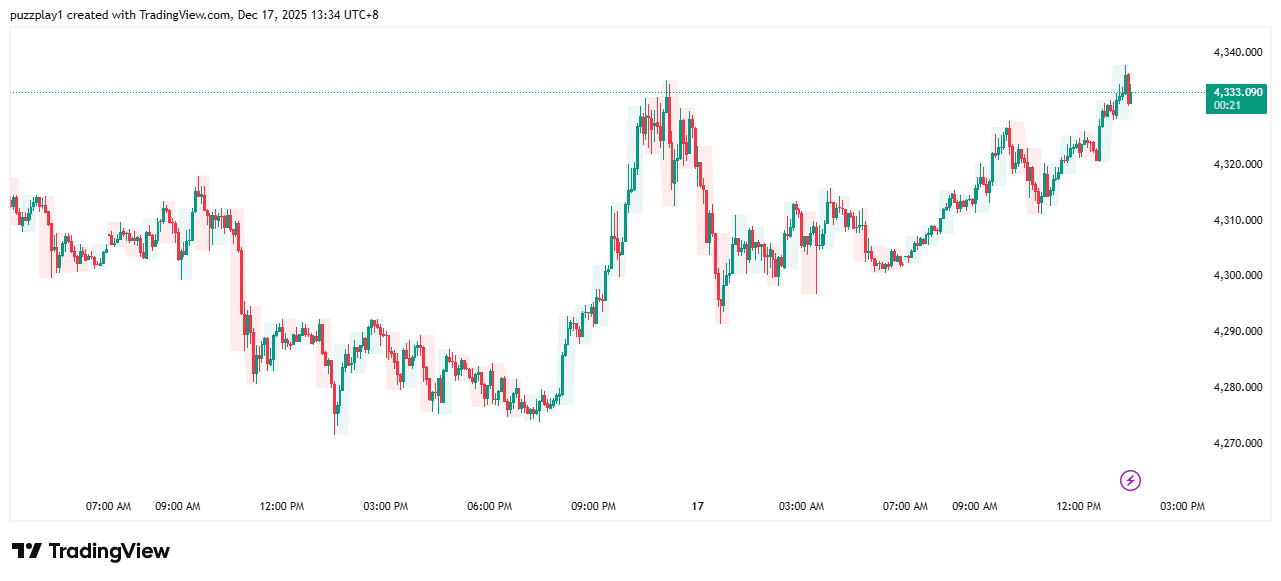